### this func is used for roc曲线

In [2]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import auc as calc_auc
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay


In [4]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform"
# exp_name = "new_PhiTrans_sim_tile5ktwice500_query_uniformx4"
exp_name = "new_PhiTrans_align_sim_tile5k_1abmil0sel"
# exp_name = "new_PhiTrans_align_sim_tile5ktwice500"
# exp_name = "new_ProtoMIL_sim_Cosine_mean_tile5ktwice500_0insteval"
tidx = 0
eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}/eval_HEROHE_test_res.csv"))
eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,pred,label,sim0,sim1,sim2,sim3,...,sim15,sim16,sim17,sim18,sim19,sim20,sim21,sim22,sim23,sim24
0,0,70,0.692185,0.307815,0,1,-0.001550,-0.046662,-0.055402,-0.026593,...,-0.089205,-0.049658,-0.049751,-0.062963,-0.027568,-0.022994,-0.072358,-0.059096,-0.056215,0.045480
1,1,71,0.043414,0.956586,1,1,0.003596,0.158584,0.165986,0.096508,...,0.298542,0.181212,0.194276,0.239234,0.106241,0.068418,0.262536,0.221395,0.155335,-0.179835
2,2,72,0.107143,0.892857,1,1,0.001830,0.089309,0.087955,0.055956,...,0.166372,0.104655,0.115003,0.140342,0.062943,0.036055,0.151394,0.129485,0.078569,-0.105527
3,3,73,0.881809,0.118191,0,1,-0.003154,-0.121657,-0.132565,-0.072630,...,-0.230152,-0.136139,-0.143189,-0.177657,-0.078601,-0.054767,-0.197561,-0.165077,-0.127503,0.131981
4,4,74,0.406501,0.593499,1,1,-0.000588,0.000502,-0.003338,0.001104,...,0.000781,0.003166,0.005566,0.005751,0.002324,-0.001384,0.004242,0.004438,-0.005482,-0.007648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,347,0.836096,0.163904,0,1,-0.002823,-0.091928,-0.099167,-0.055630,...,-0.172726,-0.102767,-0.108444,-0.134396,-0.060319,-0.040806,-0.149226,-0.125426,-0.094316,0.096255
146,146,348,0.158498,0.841502,1,1,0.000820,0.060359,0.060207,0.037269,...,0.113677,0.071088,0.077915,0.095075,0.041908,0.024836,0.102693,0.087184,0.054604,-0.074709
147,147,349,0.568074,0.431926,0,1,-0.001233,-0.025388,-0.032019,-0.014186,...,-0.048431,-0.025647,-0.024515,-0.031691,-0.014120,-0.013258,-0.037589,-0.030337,-0.033406,0.020456
148,148,350,0.159998,0.840002,1,1,0.000917,0.059813,0.059266,0.037083,...,0.112181,0.070367,0.077252,0.094259,0.041738,0.024402,0.101688,0.086553,0.053457,-0.073336


auc: 0.7933333333333332


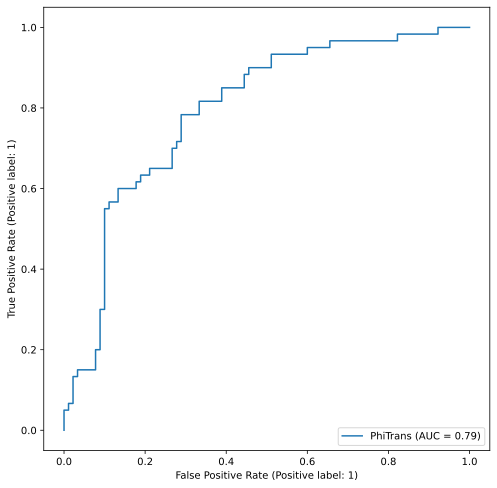

In [5]:

auc_val = roc_auc_score(eval_res["label"], eval_res["prob_pos"])
print(f"auc: {auc_val}")

# res_dict = classification_report(eval_res["label"], np.array(all_preds), 
#                                  target_names=['neg', 'pos'], output_dict=True)

roc_curve(eval_res["label"], eval_res["prob_pos"])

fig, ax = plt.subplots(figsize=(8, 8))

RocCurveDisplay.from_predictions(eval_res["label"], eval_res["prob_pos"], ax=ax,
                                 name="PhiTrans")
# RocCurveDisplay.from_predictions(eval_res["label"], eval_res["prob_neg"], ax=ax)


In [32]:
### multi mean plot roc curve
class ROCCurve_ExpsMultitimes(object):
    def __init__(self, root_path=None, exp_name=None, filename=None,
                 times=1, folds=1, plot_each=True, ax=None):
        
        if ax is None:
            fig, ax = plt.subplots(figsize=(6, 6))
            self.ax_new = True
        else:
            self.ax_new = False
        

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for tidx in range(times):
            eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}", filename))
        
            if plot_each:
                viz = RocCurveDisplay.from_predictions(
                    eval_res["label"], eval_res["prob_pos"], 
                    name=f"time{tidx}",
                    alpha=0.75,
                    lw=1,
                    ax=ax,
                    )
                each_fpr, each_tpr = viz.fpr, viz.tpr
                roc_auc_val = viz.roc_auc
            else:
                each_fpr, each_tpr, _ = roc_curve(eval_res["label"], eval_res["prob_pos"])
                roc_auc_val = roc_auc_score(eval_res["label"], eval_res["prob_pos"])

            interp_tpr = np.interp(mean_fpr, each_fpr, each_tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(roc_auc_val)

        self.tprs = tprs
        self.aucs = aucs
        self.mean_fpr = mean_fpr
        self.ax = ax

    def plot_roc_curve_summary(self, title="", main_color="r"):
        ax = self.ax

        mean_tpr = np.mean(self.tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = calc_auc(self.mean_fpr, mean_tpr)
        
        std_auc = np.std(self.aucs)

        ax.plot(
            self.mean_fpr,
            mean_tpr,
            color=main_color,
            label=f"{title} (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.9,
        )

        std_tpr = np.std(self.tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

        if self.ax_new:
            # fill_label = r"$\pm$ 1 std. dev."
            fill_label = None # TODO 如果需要的话mean +std那个小方格图例的话把这个注释掉，用上面那个，
        else:
            fill_label = None
        ax.fill_between(
            self.mean_fpr,
            tprs_lower,
            tprs_upper,
            color=main_color, # "grey",
            alpha=0.1,
            label=fill_label,
        )

        # plt.show()
        self.ax = ax

    # get ax for the next plot
    def get_ax(self):
        return self.ax
    
    def add_chance_line(self):
        self.ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100),
        linestyle='dashed',
        color="grey",
        label=f"Chance (AUC = 0.50)",
        lw=2,
        alpha=0.75
        )

    def fig_ax_over(self):
        self.ax.set(
            xlim=[-0.05, 1.05],
            ylim=[-0.05, 1.05],
            xlabel="False Positive Rate",
            ylabel="True Positive Rate",
            title=f"Mean ROC curve with variability\n",
        )
        self.ax.axis("square")
        self.ax.legend(loc="lower right")
        # plt.show()

### 下面是把我们phitrans方法的所有的times的roc曲线进行plot

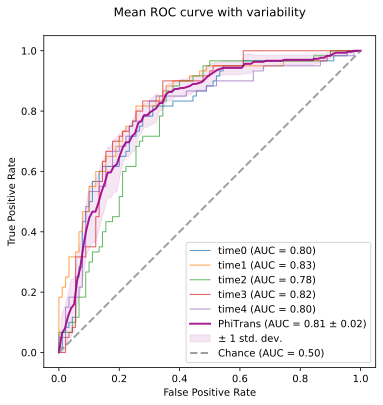

In [31]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "split_latest_test_0_results.csv"


exp_name = "new_PhiTrans_align_sim_tile5ktwice500_abmilsel0"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, exp_name=exp_name, filename=filename,
                                       times=5, folds=1, plot_each=True)
exp_roccurve.plot_roc_curve_summary(title="PhiTrans", main_color="#9f0088")
# ax = exp_roccurve.get_ax()

exp_roccurve.add_chance_line()
exp_roccurve.fig_ax_over()


### 下面是把所有的对比方法的roc曲线进行plot

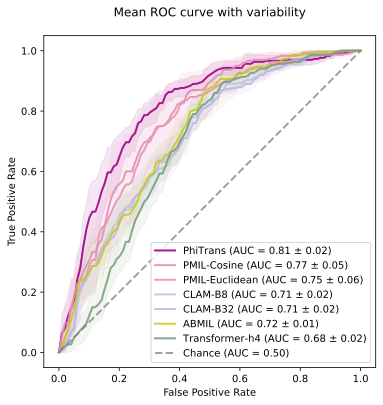

In [34]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "split_latest_test_0_results.csv"



exp_name = "new_PhiTrans_align_sim_tile5ktwice500_abmilsel0"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, exp_name=exp_name, filename=filename,
                                       times=5, folds=1, plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="PhiTrans", main_color="#9f0088")
ax = exp_roccurve.get_ax()



exp_name = "new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                       exp_name=exp_name, 
                                       times=5, folds=1, ax=ax,
                                        plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="PMIL-Cosine", main_color="#dd91b8")


exp_name = "new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                       exp_name=exp_name, 
                                       times=5, folds=1, ax=ax,
                                        plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="PMIL-Euclidean", main_color="#E793B5") # eec3d8



exp_name = "new_CLAM_8"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                       exp_name=exp_name, 
                                       times=5, folds=1, ax=ax,
                                        plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="CLAM-B8", main_color="#B6C9D8")


exp_name = "new_CLAM"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                       exp_name=exp_name, 
                                       times=5, folds=1, ax=ax,
                                        plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="CLAM-B32", main_color="#C5B5E6")


exp_name = "new_ABMIL_tile5k_all"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                       exp_name=exp_name, 
                                       times=5, folds=1, ax=ax,
                                        plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="ABMIL", main_color="#C7C826")



exp_name = "new_Transformer"
exp_roccurve = ROCCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                       exp_name=exp_name, 
                                       times=5, folds=1, ax=ax,
                                        plot_each=False)
exp_roccurve.plot_roc_curve_summary(title="Transformer-h4", main_color="#799f80")

exp_roccurve.add_chance_line()
exp_roccurve.fig_ax_over()


### 这里是plot PR曲线

In [27]:
### multi mean plot PR curve
class PRCurve_ExpsMultitimes(object):
    def __init__(self, root_path=None, exp_name=None, filename=None,
                 times=1, folds=1, plot_each=True, ax=None):
        
        if ax is None:
            fig, ax = plt.subplots(figsize=(7, 8))

            f_scores = np.linspace(0.2, 0.8, num=4)
            lines, labels = [], []
            for f_score in f_scores:
                x = np.linspace(0.01, 1)
                y = f_score * x / (2 * x - f_score)
                (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.3)
                plt.annotate("F1 = {0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))
            
            self.ax_new = True
            
        else:
            self.ax_new = False
        

        precisions = []
        ap_vals = []
        mean_recall = np.linspace(0, 1, 100)

        for tidx in range(times):
            eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}", filename))
        
            if plot_each:
                
                viz = PrecisionRecallDisplay.from_predictions(
                    eval_res["label"], eval_res["prob_pos"], 
                    name=f"time{tidx}",
                    alpha=0.5,
                    lw=1,
                    ax=ax,
                    plot_chance_level=False,
                    )
                each_recall, each_precision = viz.recall, viz.precision
                ap_val = viz.average_precision

                # precision, recall, _ = precision_recall_curve(eval_res["label"], eval_res["prob_pos"])
                # disp = PrecisionRecallDisplay(precision=precision, recall=recall)
                # disp.plot(plot_chance_level=True)

            else:
                each_precision, each_recall, _ = precision_recall_curve(eval_res["label"], eval_res["prob_pos"])
                ap_val = average_precision_score(eval_res["label"], eval_res["prob_pos"])
            
            interp_precision = np.interp(mean_recall, each_recall[::-1], each_precision[::-1])
            # 这里上面算插值时需要注意下，因为pr曲线是向下的，所以x和y点是反向的，x即each_recall逐渐变小，而y即each_precision变大，
            # 而np.interp要求x是increasing的，所以设置each_recall[::-1], each_precision[::-1]
            interp_precision[0] = 1.0
            precisions.append(interp_precision)
            ap_vals.append(ap_val)

        self.precisions = precisions
        self.ap_vals = ap_vals
        self.mean_recall = mean_recall
        self.ax = ax

    def plot_roc_curve_summary(self, title="", main_color="r"):
        ax = self.ax

        mean_precision = np.mean(self.precisions, axis=0)
        # mean_precision[-1] = 0
        # mean_auc = calc_auc(self.mean_recall, mean_precision)
        
        mean_ap = np.mean(self.ap_vals)
        std_ap = np.std(self.ap_vals)

        ax.plot(
            self.mean_recall,
            mean_precision,
            color=main_color,
            label=f"{title} (mean AP = %0.2f $\pm$ %0.2f)" % (mean_ap, std_ap),
            lw=2,
            alpha=0.9,
        )

        std_precision = np.std(self.precisions, axis=0)
        precisions_upper = np.minimum(mean_precision + std_precision, 1)
        precisions_lower = np.maximum(mean_precision - std_precision, 0)

        if self.ax_new:
            # fill_label = r"$\pm$ 1 std. dev."
            fill_label = None
        else:
            fill_label = None
        ax.fill_between(
            self.mean_recall,
            precisions_lower,
            precisions_upper,
            color=main_color, # "grey",
            alpha=0.1,
            label=fill_label,
        )

        # plt.show()
        self.ax = ax

    # get ax for the next plot
    def get_ax(self):
        return self.ax
    
    def add_chance_line(self):
        self.ax.plot(np.linspace(0, 1, 100), [0.4]*100,
        linestyle='dashed',
        color="grey",
        label=f"Chance (AP = 0.40)",
        lw=2,
        alpha=0.75
        )

    def fig_ax_over(self):
        self.ax.set(
            xlim=[0.0, 1.05],
            ylim=[0.0, 1.05],
            
            xlabel="Recall",
            ylabel="Precision",
            title=f"PR curve\n",
        )
        # self.ax.axis("square")
        self.ax.legend(loc="lower left")

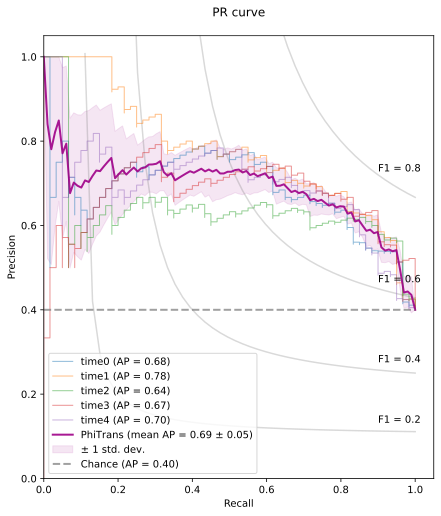

In [26]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "split_latest_test_0_results.csv"


exp_name = "new_PhiTrans_align_sim_tile5ktwice500_abmilsel0"
exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, exp_name=exp_name, filename=filename,
                                    times=5, folds=1, plot_each=True)
exp_roccurve.plot_roc_curve_summary(title="PhiTrans", main_color="#9f0088")
ax = exp_roccurve.get_ax()

exp_roccurve.add_chance_line()
exp_roccurve.fig_ax_over()



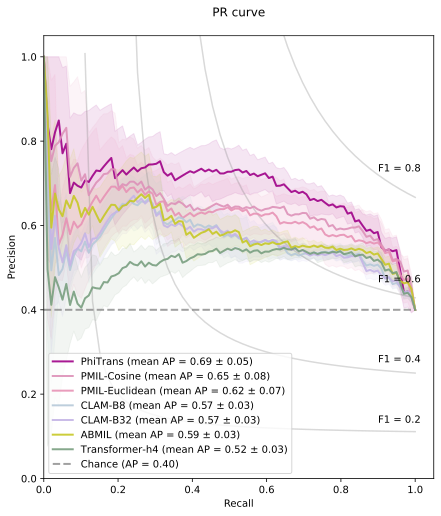

In [35]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "split_latest_test_0_results.csv"


while 1:
    exp_name = "new_PhiTrans_align_sim_tile5ktwice500_abmilsel0"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, exp_name=exp_name, filename=filename,
                                        times=5, folds=1, plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="PhiTrans", main_color="#9f0088")
    ax = exp_roccurve.get_ax()
    

    exp_name = "new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                        exp_name=exp_name, 
                                        times=5, folds=1, ax=ax,
                                            plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="PMIL-Cosine", main_color="#dd91b8")


    exp_name = "new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                        exp_name=exp_name, 
                                        times=5, folds=1, ax=ax,
                                            plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="PMIL-Euclidean", main_color="#E793B5") # eec3d8



    exp_name = "new_CLAM_8"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                        exp_name=exp_name, 
                                        times=5, folds=1, ax=ax,
                                            plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="CLAM-B8", main_color="#B6C9D8")


    exp_name = "new_CLAM"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                        exp_name=exp_name, 
                                        times=5, folds=1, ax=ax,
                                            plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="CLAM-B32", main_color="#C5B5E6")


    exp_name = "new_ABMIL_tile5k_all"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                        exp_name=exp_name, 
                                        times=5, folds=1, ax=ax,
                                            plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="ABMIL", main_color="#C7C826")



    exp_name = "new_Transformer"
    exp_roccurve = PRCurve_ExpsMultitimes(root_path=root_path, filename=filename,
                                        exp_name=exp_name, 
                                        times=5, folds=1, ax=ax,
                                            plot_each=False)
    exp_roccurve.plot_roc_curve_summary(title="Transformer-h4", main_color="#799f80")

    exp_roccurve.add_chance_line()
    exp_roccurve.fig_ax_over()
    

    break

In [141]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
y
sum(y == 1) / len(y)

0.3333333333333333